In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random

# Testing the two neural networks

This code show loss vs epoch during training phase of the two neural networks and show two examples using these models

In [2]:
# Import model real part
from tensorflow.keras.models import load_model
model_real = load_model('best_real_part_model.h5')
model_real.summary()
print('\n'*2)

# Import model imag part
model_imag = load_model('best_imag_part_model.h5')
model_imag.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 51)                5151      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5200      
Total params: 10,351
Trainable params: 10,351
Non-trainable params: 0
_________________________________________________________________



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 51)                5151      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5200      
Total params: 10,351
Trainable params: 10,351
Non-trainable params: 0
_________________________________________________________________


	Min loss=1.97E-09
	Min val loss=1.96E-09
Last epoch: 
	Loss=1.97E-09
	Val loss=1.96E-09
Epochs= 1500


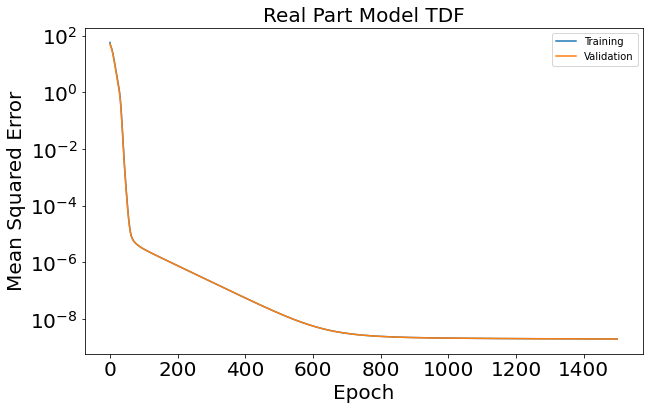

In [15]:
# Plot loss model real part

history_real = np.load('history_real_part.npy', allow_pickle=True).item()
loss = history_real['loss']
val_loss = history_real['val_loss']

print('\tMin loss={:.2E}'.format(np.min(loss)))
print('\tMin val loss={:.2E}'.format(np.min(val_loss)))
print("Last epoch: ")
print("\tLoss={:.2E}".format(loss[-1]))
print("\tVal loss={:.2E}".format(val_loss[-1]))
print("Epochs=", len(loss))

fig_real, ax_real = plt.subplots(figsize=(10,6))
ax_real.plot(np.arange(1500), loss, label='Training')
ax_real.plot(np.arange(1500), val_loss, label='Validation')
plt.yscale('log')
plt.title("Real Part Model TDF", fontsize=20)
plt.ylabel("Mean Squared Error", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.tick_params(labelsize=20)
plt.legend()
plt.show()

	Min loss=7.16E-09
	Min val loss=7.20E-09
Last epoch: 
	Loss=7.16E-09
	Val loss=7.20E-09
Epochs= 1500


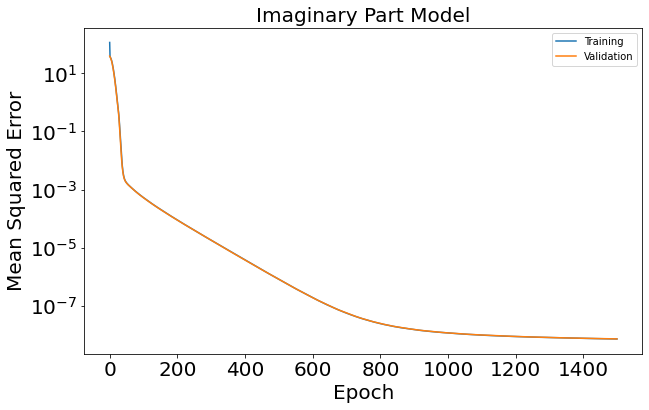

In [16]:
# Plot loss model imag part
history_imag = np.load('history_imag_part.npy', allow_pickle=True).item()
loss2 = history_imag['loss']
val_loss2 = history_imag['val_loss']

print('\tMin loss={:.2E}'.format(np.min(loss2)))
print('\tMin val loss={:.2E}'.format(np.min(val_loss2)))
print("Last epoch: ")
print("\tLoss={:.2E}".format(loss2[-1]))
print("\tVal loss={:.2E}".format(val_loss2[-1]))
print("Epochs=", len(loss2))

fig_imag, ax_imag = plt.subplots(figsize=(10,6))
ax_imag.plot(np.arange(1500), loss2, label='Training')
ax_imag.plot(np.arange(1500),val_loss2, label='Validation')
ax_imag.set(xlabel='Epoch', ylabel='Mean Squared Error')
plt.yscale('log')
plt.title("Imaginary Part Model", fontsize=20)
plt.ylabel("Mean Squared Error", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.tick_params(labelsize=20)
plt.legend()
plt.show()

### Generate a signal - Example 1

In [5]:
# Sum of two sinusoids
t = np.linspace(0, 1, 100) # Time vector
x_data1 = []
x_data1.append(np.sin(2*np.pi*5*t) + np.sin(2*np.pi*10*t) + 0.5*np.random.randn(100))
x_data1 = np.array(x_data1).reshape((1, 100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


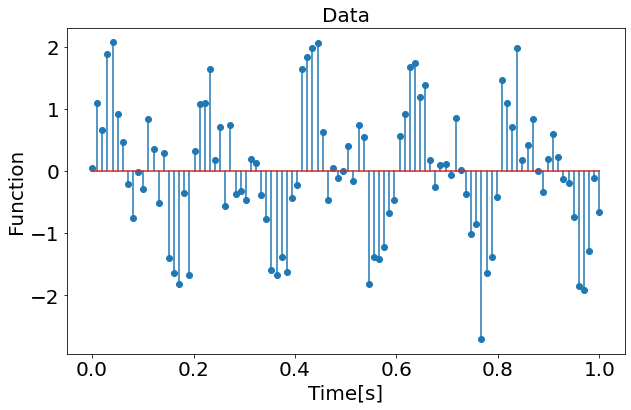

In [6]:
# Plot example
N = np.arange(1, len(x_data1[0])+1) # examples vector
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(t,x_data1[0])
plt.title("Data", fontsize=20)
plt.ylabel("Function", fontsize=20)
plt.xlabel("Time[s]", fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

Generate the DFT using a Numpy function to compare

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


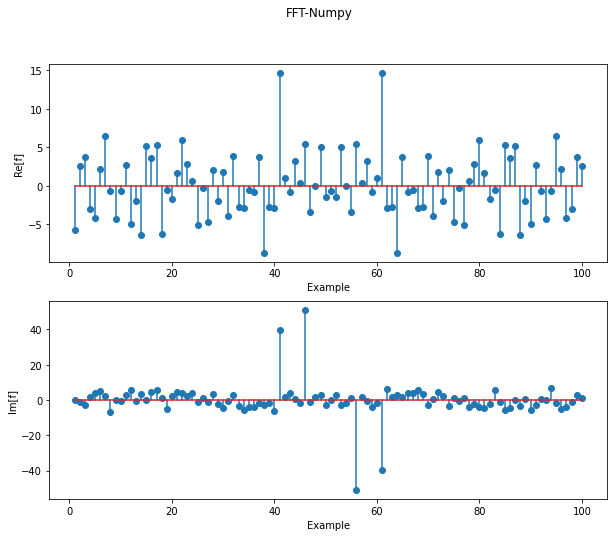

In [7]:
# FFT-Numpy
f_hat = np.fft.fft(x_data1, 100)
real = np.real(f_hat)
imag = np.imag(f_hat)

# Plot Real and imag part
fig1, (ax_r, ax_i) = plt.subplots(2, 1, figsize=(10, 8))
fig1.suptitle('FFT-Numpy')
ax_r.set(xlabel='Example', ylabel='Re[f]')
ax_r.stem(N, np.fft.fftshift(real[0]))

ax_i.set(xlabel='Example', ylabel='Im[f]')
ax_i.stem(N,np.fft.fftshift(imag[0]))

plt.show()

Estimate the DFT using the two neural networks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


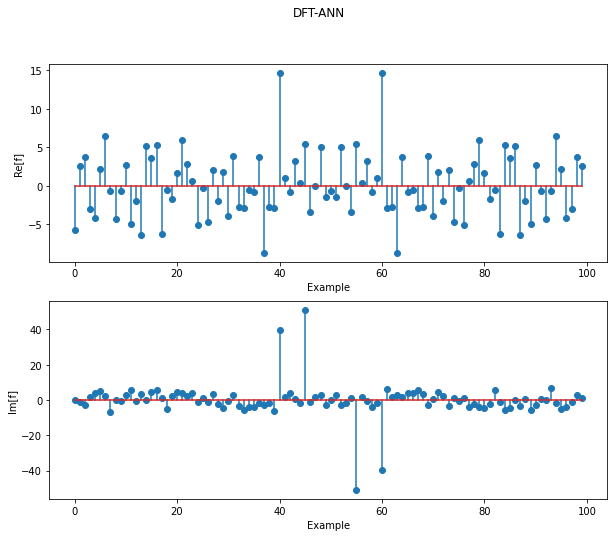

In [8]:
# DTF - ANN
real_pred = model_real.predict(x_data1)
imag_pred = model_imag.predict(x_data1)

# Show the result
fig2, (ax_r_ann, ax_i_ann) = plt.subplots(2, 1, figsize=(10,8))
fig2.suptitle('DFT-ANN')
ax_r_ann.set(xlabel='Example', ylabel="Re[f]")
ax_r_ann.stem(np.arange(100), np.fft.fftshift(real_pred[0]))

ax_i_ann.set(xlabel='Example', ylabel="Im[f]")
ax_i_ann.stem(np.arange(100), np.fft.fftshift(imag_pred[0]))

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


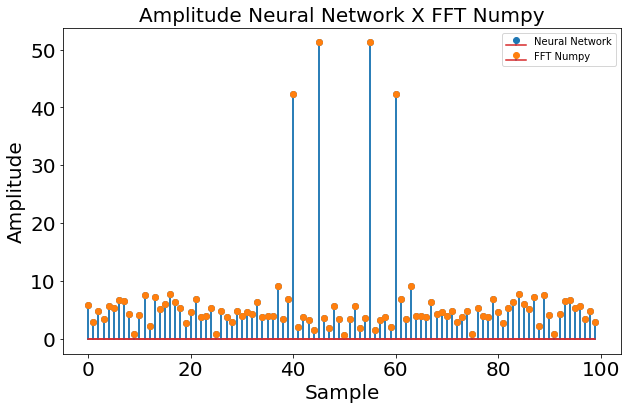

In [9]:
# Amplitude 
amplitude = np.fft.fftshift(np.abs(f_hat))
amplitude_pred = np.fft.fftshift(np.sqrt(real_pred[0]**2 + imag_pred[0]**2))

fig3, ax_amp = plt.subplots(figsize=(10,6))
ax_amp.stem(np.arange(len(x_data1[0])), amplitude_pred, label="Neural Network")
ax_amp.stem(np.arange(len(x_data1[0])), amplitude[0], label="FFT Numpy", markerfmt='C1o')

plt.title("Amplitude Neural Network X FFT Numpy", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Sample", fontsize=20)
plt.tick_params(labelsize=20)
plt.legend()
plt.show()

### Generate a signal - Example 2

In [10]:
# Example 6.57 Signals and Systems - Hsu
x_data2 = np.array([1, 1, -1, -1, -1, 1, 1, -1]).reshape((1,-1))
print(x_data2.shape)

(1, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


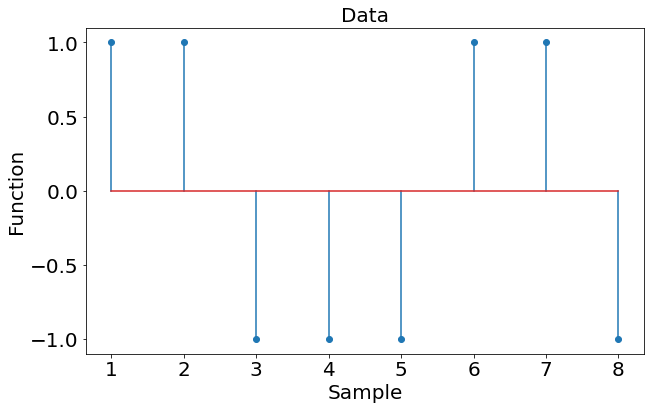

In [11]:
# Plot example
N = np.arange(1, len(x_data2[0])+1) # examples vector
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(N,x_data2[0])
plt.title("Data", fontsize=20)
plt.ylabel("Function", fontsize=20)
plt.xlabel("Sample", fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

Generate the DFT using a Numpy function to compare

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


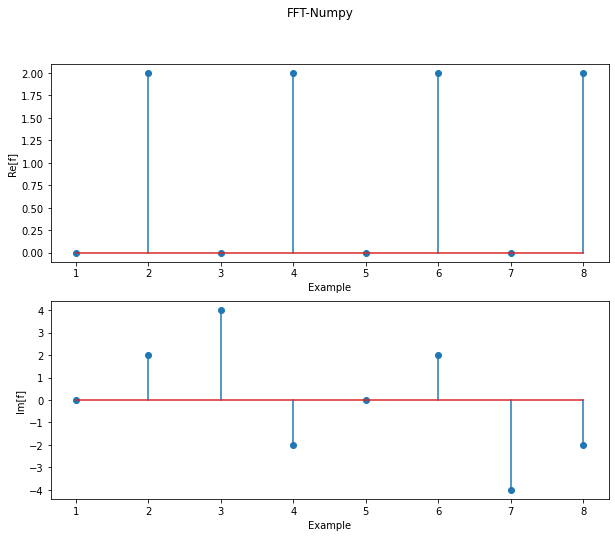

In [12]:
# FFT-Numpy
f_hat = np.fft.fft(x_data2, 8)
real = np.real(f_hat)
imag = np.imag(f_hat)

# Plot Real and imag part
fig1, (ax_r, ax_i) = plt.subplots(2, 1, figsize=(10, 8))
fig1.suptitle('FFT-Numpy')
ax_r.set(xlabel='Example', ylabel='Re[f]')
ax_r.stem(N, np.fft.fftshift(real[0]))

ax_i.set(xlabel='Example', ylabel='Im[f]')
ax_i.stem(N,np.fft.fftshift(imag[0]))

plt.show()

Estimate the DFT using the two neural networks

[ 1  1 -1 -1 -1  1  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


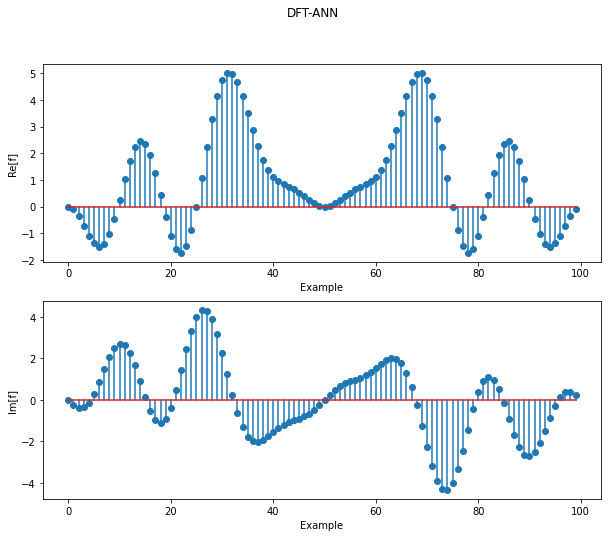

In [13]:
# DTF - ANN
add_zeros = 100 - len(x_data2[0]) 
x_data2_pad = np.pad(x_data2[0], (0,add_zeros),'constant')
print(x_data2_pad)
x_data2_pad = x_data2_pad.reshape((-1,100))
real_pred = model_real.predict(x_data2_pad)
imag_pred = model_imag.predict(x_data2_pad)

fig2, (ax_r_ann, ax_i_ann) = plt.subplots(2, 1, figsize=(10,8))
fig2.suptitle('DFT-ANN')
ax_r_ann.set(xlabel='Example', ylabel="Re[f]")
ax_r_ann.stem(np.arange(100), np.fft.fftshift(real_pred[0]))

ax_i_ann.set(xlabel='Example', ylabel="Im[f]")
ax_i_ann.stem(np.arange(100), np.fft.fftshift(imag_pred[0]))

plt.show()

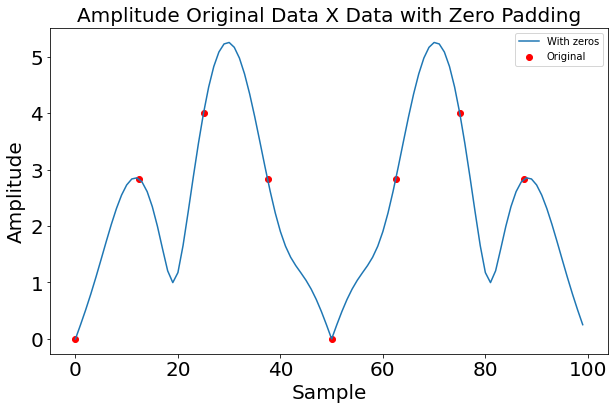

In [14]:
# Amplitude 
amplitude = np.fft.fftshift(np.abs(f_hat))
amplitude_pred = np.fft.fftshift(np.sqrt(real_pred[0]**2 + imag_pred[0]**2))

fig3, ax_amp = plt.subplots(figsize=(10,6))
ax_amp.plot(np.arange(len(x_data2_pad[0])), amplitude_pred, label="With zeros")
ax_amp.scatter(np.arange(len(x_data2[0]))*100/8, amplitude, label="Original", color='red')

plt.title("Amplitude Original Data X Data with Zero Padding", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Sample", fontsize=20)
plt.tick_params(labelsize=20)
plt.legend()
plt.show()